In [1]:
import pickle
import numpy as np
from tensorflow.keras.utils import to_categorical

def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as file:
        batch = pickle.load(file, encoding='bytes')
    return batch

def load_cifar10_data(folder_path):
    train_data = []
    train_labels = []

    for i in range(1, 6):
        batch_file = f"{folder_path}/data_batch_{i}"
        batch = load_cifar10_batch(batch_file)
        train_data.append(batch[b'data'])
        train_labels.extend(batch[b'labels'])

    test_batch_file = f"{folder_path}/test_batch"
    test_batch = load_cifar10_batch(test_batch_file)
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']

    train_data = np.vstack(train_data)
    train_labels = np.array(train_labels)
    test_labels = np.array(test_labels)

    return train_data, train_labels, test_data, test_labels

def preprocess_data(train_data, train_labels, test_data, test_labels):
    train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

    train_labels_onehot = to_categorical(train_labels)
    test_labels_onehot = to_categorical(test_labels)

    return train_data, train_labels_onehot, test_data, test_labels_onehot

cifar10_folder = 'cifar-10-batches-py'

train_data, train_labels, test_data, test_labels = load_cifar10_data(cifar10_folder)

x_train, y_train, x_test, y_test = preprocess_data(
    train_data, train_labels, test_data, test_labels
)

print("Train Data Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Data Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Data Shape: (50000, 32, 32, 3)
Train Labels Shape: (50000, 10)
Test Data Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 10)


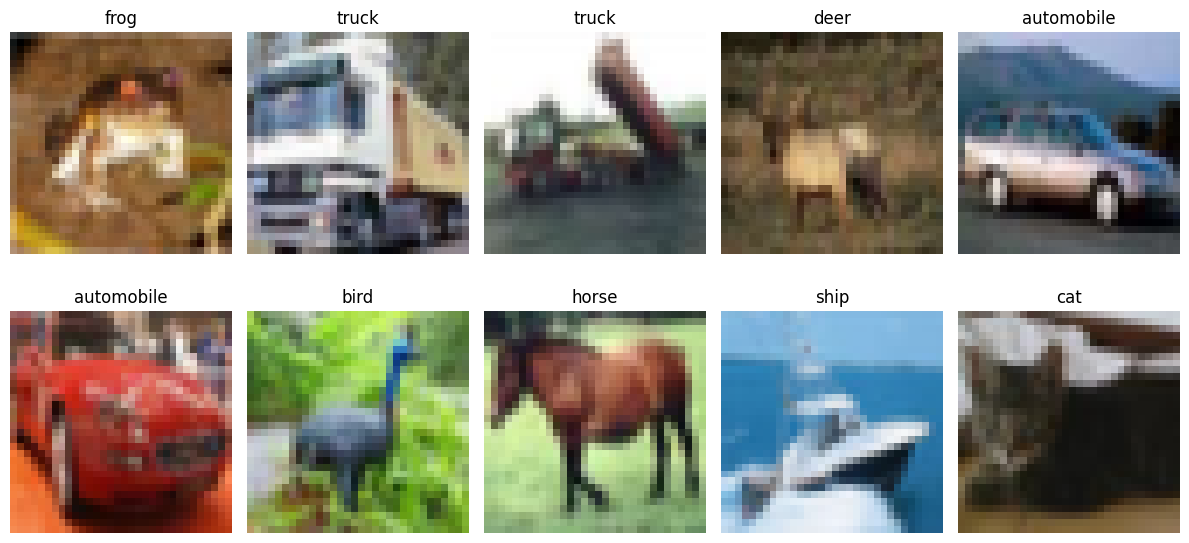

In [2]:
import matplotlib.pyplot as plt

# Define the class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot sample images
def plot_sample_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()

    for i in range(10):
        axes[i].imshow(images[i])
        axes[i].set_title(class_labels[labels[i]])
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Plot sample images
plot_sample_images(x_train, np.argmax(y_train, axis=1))


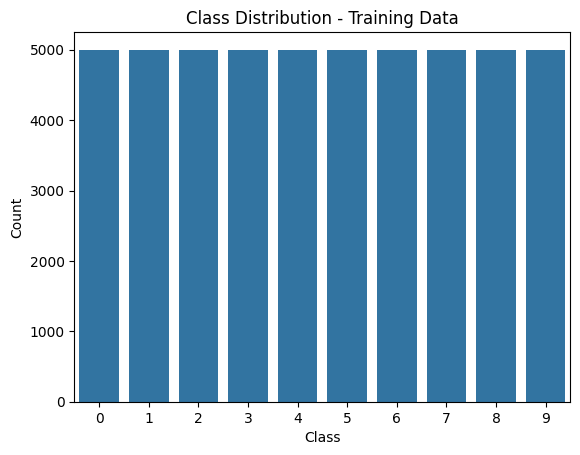

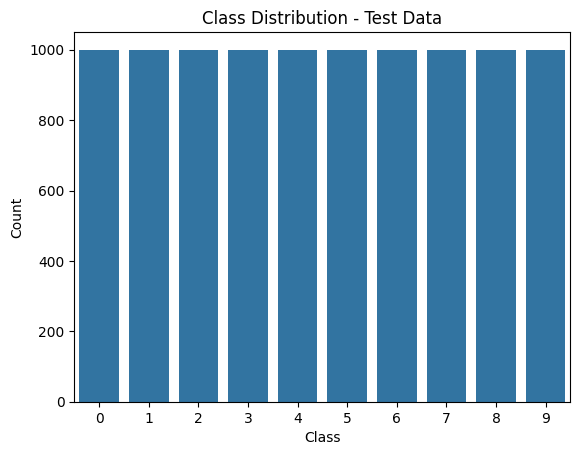

In [5]:
import seaborn as sns

# Plot class distribution of training data
sns.countplot(x=np.argmax(y_train, axis=1))
plt.title('Class Distribution - Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plot class distribution of test data
sns.countplot(x=np.argmax(y_test, axis=1))
plt.title('Class Distribution - Test Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


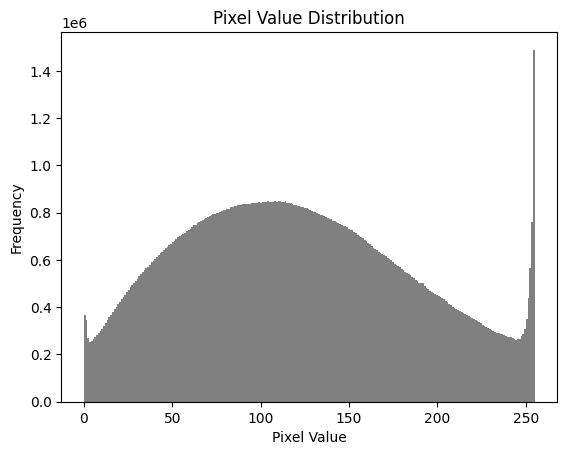

In [6]:
import matplotlib.pyplot as plt

# Flatten the image data
flattened_data = x_train.flatten()

# Plot the histogram
plt.hist(flattened_data, bins=256, color='gray')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
